In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning 

## Data Understanding

In [198]:
df=pd.read_csv("Leads.csv")

In [199]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [200]:
df.shape

(9240, 37)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [202]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [203]:
a=df.columns
a[0]

'Prospect ID'

## Changing Select field to NaN

In [204]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [205]:
for i in a:
    df.loc[df[i]=='Select',i]=np.NaN


In [206]:
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

## Percentage of Missing Values

In [207]:
100*df.isnull().sum()/df.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Dropping Column with High Percentage of Missing Values

In [208]:
df1=df.drop(['Specialization','Tags','City','How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [209]:
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [210]:
df1.shape

(9240, 27)

In [211]:
100*df1.isnull().sum()/df1.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

## Dropping highly Skewed columns

In [212]:
df1['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Kuwait                  0.000590
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
South Africa            0.000590
Sweden                  0.000443
Asia/Pacific Region     0.000295
Ghana                   0.000295
China                   0.000295
Bangladesh              0.000295
Philippines             0.000295
Belgium                 0.000295
Uganda                  0.000295
Italy                   0.000295
Netherlands             0.000295
Denmark                 0.000148
Indonesia               0.000148
Russia    

In [213]:
df1['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [214]:
df1['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [215]:
df1['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [216]:
df1['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [217]:
df1['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [218]:
df1['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [219]:
df1['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [220]:
df1['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [221]:
df1['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [222]:
df1['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [223]:
df1['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [224]:
df1['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [225]:
df1['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [226]:
df1['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [227]:
df2=df1.drop(['Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper Article','Search', 'Magazine','Do Not Email', 'Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course'],axis=1)

In [228]:
df2.shape

(9240, 14)

In [229]:
df2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'X Education Forums', 'Newspaper',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [230]:
df2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [231]:
100*df2.isnull().sum()/df2.shape[0]

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
X Education Forums                          0.000000
Newspaper                                   0.000000
I agree to pay the amount through cheque    0.000000
A free copy of Mastering The Interview      0.000000
Last Notable Activity                       0.000000
dtype: float64

## Dropping rows with missing percentage

In [232]:
df2=df2.dropna(how='all',subset=['TotalVisits','Page Views Per Visit','Lead Source'])

In [233]:
100*df2.isnull().sum()/df2.shape[0]

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.314091
Converted                                   0.000000
TotalVisits                                 1.407993
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.407993
Last Activity                               1.093902
X Education Forums                          0.000000
Newspaper                                   0.000000
I agree to pay the amount through cheque    0.000000
A free copy of Mastering The Interview      0.000000
Last Notable Activity                       0.000000
dtype: float64

## Impute values for columns with less percentage of missing 

In [234]:
df2['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
welearnblog_Home     0.000109
testone              0.000109
WeLearn              0.000109
NC_EDM               0.000109
youtubechannel       0.000109
blog                 0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64

In [235]:
LS_mode=df2['Lead Source'].mode()[0]
LS_mode

'Google'

In [236]:
df2['Lead Source'].fillna(LS_mode,inplace=True)

In [237]:
df2['Lead Source'].isnull().sum()

0

In [238]:
df2['TotalVisits'].value_counts(normalize=True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
23.0     0.000659
21.0     0.000659
27.0     0.000549
24.0     0.000549
25.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
251.0    0.000110
74.0     0.000110
30.0     0.000110
141.0    0.000110
54.0     0.000110
41.0     0.000110
115.0    0.000110
43.0     0.000110
42.0     0.000110
32.0     0.000110
55.0     0.000110
Name: TotalVisits, dtype: float64

In [239]:
tv_mode=df2['TotalVisits'].mode()[0]
df2['TotalVisits'].fillna(tv_mode,inplace=True)

In [240]:
df2['Page Views Per Visit'].value_counts(normalize=True)


0.00    0.240470
2.00    0.197188
3.00    0.131385
4.00    0.098429
1.00    0.071515
          ...   
1.27    0.000110
8.21    0.000110
2.14    0.000110
2.63    0.000110
2.45    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

In [241]:
df2.loc[df2['Page Views Per Visit']=='others','Page Views Per Visit']=np.NaN


In [242]:
df2['Page Views Per Visit'].isnull().sum()/df2.shape[0]


0.014079930683418174

In [243]:
df2['Page Views Per Visit'].value_counts()


0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [244]:
pv_mode=df2['Page Views Per Visit'].mode()[0]


In [245]:
df2['Page Views Per Visit'].fillna(pv_mode,inplace=True)


In [246]:
df2['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376369
SMS Sent                        0.300591
Olark Chat Conversation         0.106548
Page Visited on Website         0.070083
Converted to Lead               0.046868
Email Bounced                   0.035151
Email Link Clicked              0.029238
Form Submitted on Website       0.012703
Unreachable                     0.010184
Unsubscribed                    0.006680
Had a Phone Conversation        0.003285
Approached upfront              0.000986
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Resubscribed to emails          0.000110
Visited Booth in Tradeshow      0.000110
Name: Last Activity, dtype: float64

In [247]:
L_MODE=df2['Last Activity'].mode()[0]

In [248]:
df2['Last Activity'].fillna(L_MODE,inplace=True)

In [249]:
100*df2.isnull().sum()/df2.shape[0]

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
X Education Forums                          0.0
Newspaper                                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

In [250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9233 non-null   object 
 1   Lead Number                               9233 non-null   float64
 2   Lead Origin                               9233 non-null   object 
 3   Lead Source                               9233 non-null   object 
 4   Converted                                 9233 non-null   float64
 5   TotalVisits                               9233 non-null   float64
 6   Total Time Spent on Website               9233 non-null   float64
 7   Page Views Per Visit                      9233 non-null   float64
 8   Last Activity                             9233 non-null   object 
 9   X Education Forums                        9233 non-null   object 
 10  Newspaper                           

In [251]:
df2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.000000,9233.000000,9233.000000,9233.000000,9233.000000
mean,617189.291779,0.385357,3.396729,487.470595,2.329552
std,23407.938279,0.486706,4.837612,547.802014,2.164128
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596485.000000,0.000000,0.000000,12.000000,0.000000
50%,615477.000000,0.000000,3.000000,248.000000,2.000000
75%,637388.000000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## Combining Categories of Columns with less percentage  

In [252]:
df2['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.529189
API                        0.387740
Lead Add Form              0.077115
Lead Import                0.005957
Name: Lead Origin, dtype: float64

In [253]:
df2.loc[df2['Lead Origin']=='Lead Import','Lead Origin']='others'
df2.loc[df2['Lead Origin']=='Quick Add Form','Lead Origin']='others'
df2.loc[df2['Lead Origin']=='Lead Add Form','Lead Origin']='others'

In [254]:
df2['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.529189
API                        0.387740
others                     0.083072
Name: Lead Origin, dtype: float64

In [255]:
df2['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368244
Email Opened                    0.306184
SMS Sent                        0.235243
Page Visited on Website         0.034442
Olark Chat Conversation         0.019820
Email Link Clicked              0.018737
Email Bounced                   0.006498
Unsubscribed                    0.005090
Unreachable                     0.003466
Had a Phone Conversation        0.001516
Email Marked Spam               0.000217
Email Received                  0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

In [256]:
df2.loc[df2['Last Notable Activity']=='Email Received','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Olark Chat Conversation','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Email Link Clicked','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Email Bounced','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Unsubscribed','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Unreachable','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Page Visited on Website','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Had a Phone Conversation','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Email Marked Spam','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Form Submitted on Website','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='View in browser link Clicked','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Approached upfront','Last Notable Activity']='others'
df2.loc[df2['Last Notable Activity']=='Resubscribed to emails','Last Notable Activity']='others'

In [257]:
df2['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368244
Email Opened    0.306184
SMS Sent        0.235243
others          0.090328
Name: Last Notable Activity, dtype: float64

In [258]:
df2['Lead Source'].value_counts(normalize=True)

Google               0.313766
Direct Traffic       0.275425
Olark Chat           0.190079
Organic Search       0.124986
Reference            0.057836
Welingak Website     0.015380
Referral Sites       0.013538
Facebook             0.005957
bing                 0.000650
google               0.000542
Click2call           0.000433
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
welearnblog_Home     0.000108
testone              0.000108
WeLearn              0.000108
NC_EDM               0.000108
youtubechannel       0.000108
blog                 0.000108
Pay per Click Ads    0.000108
Name: Lead Source, dtype: float64

In [259]:
df2.loc[df2['Lead Source']=='Welingak Website','Lead Source']='others'
df2.loc[df2['Lead Source']=='Referral Sites','Lead Source']='others'
df2.loc[df2['Lead Source']=='Facebook','Lead Source']='others'
df2.loc[df2['Lead Source']=='bing','Lead Source']='others'
df2.loc[df2['Lead Source']=='Click2call','Lead Source']='others'
df2.loc[df2['Lead Source']=='Press_Release','Lead Source']='others'
df2.loc[df2['Lead Source']=='Social Media','Lead Source']='others'
df2.loc[df2['Lead Source']=='Live Chat','Lead Source']='others'
df2.loc[df2['Lead Source']=='Pay per Click Ads','Lead Source']='others'
df2.loc[df2['Lead Source']=='NC_EDM','Lead Source']='others'
df2.loc[df2['Lead Source']=='blog','Lead Source']='others'
df2.loc[df2['Lead Source']=='WeLearn','Lead Source']='others'
df2.loc[df2['Lead Source']=='youtubechannel','Lead Source']='others'
df2.loc[df2['Lead Source']=='welearnblog_Home','Lead Source']='others'
df2.loc[df2['Lead Source']=='testone','Lead Source']='others'
df2.loc[df2['Lead Source']=='google','Lead Source']='Google'

In [260]:
df2['Lead Source'].value_counts(normalize=True)

Google            0.314307
Direct Traffic    0.275425
Olark Chat        0.190079
Organic Search    0.124986
Reference         0.057836
others            0.037366
Name: Lead Source, dtype: float64

In [261]:
df2['Last Activity'].value_counts(normalize=True)

Email Opened                    0.383191
SMS Sent                        0.297303
Olark Chat Conversation         0.105383
Page Visited on Website         0.069317
Converted to Lead               0.046355
Email Bounced                   0.034767
Email Link Clicked              0.028918
Form Submitted on Website       0.012564
Unreachable                     0.010073
Unsubscribed                    0.006607
Had a Phone Conversation        0.003249
Approached upfront              0.000975
View in browser link Clicked    0.000650
Email Received                  0.000217
Email Marked Spam               0.000217
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64

In [262]:
df2.loc[df2['Last Activity']=='Converted to Lead','Last Activity']='others'
df2.loc[df2['Last Activity']=='Email Bounced','Last Activity']='others'
df2.loc[df2['Last Activity']=='Email Link Clicked','Last Activity']='others'
df2.loc[df2['Last Activity']=='Form Submitted on Website','Last Activity']='others'
df2.loc[df2['Last Activity']=='Unreachable','Last Activity']='others'
df2.loc[df2['Last Activity']=='Unsubscribed','Last Activity']='others'
df2.loc[df2['Last Activity']=='Had a Phone Conversation','Last Activity']='others'
df2.loc[df2['Last Activity']=='Approached upfront','Last Activity']='others'
df2.loc[df2['Last Activity']=='View in browser link Clicked','Last Activity']='others'
df2.loc[df2['Last Activity']=='Email Marked Spam','Last Activity']='others'
df2.loc[df2['Last Activity']=='Visited Booth in Tradeshow','Last Activity']='others'
df2.loc[df2['Last Activity']=='Resubscribed to emails','Last Activity']='others'
df2.loc[df2['Last Activity']=='Google','Last Activity']='others'
df2.loc[df2['Last Activity']=='Email Received','Last Activity']='others'

In [263]:
df2['Last Activity'].value_counts(normalize=True)

Email Opened               0.383191
SMS Sent                   0.297303
others                     0.144807
Olark Chat Conversation    0.105383
Page Visited on Website    0.069317
Name: Last Activity, dtype: float64

In [264]:
100*df2.isnull().sum()/df2.shape[0]

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
X Education Forums                          0.0
Newspaper                                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

## Percentage of rows retained

In [265]:
100*df2.shape[0]/df.shape[0]

99.92424242424242

In [266]:
df2.shape

(9233, 14)

In [267]:
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,X Education Forums,Newspaper,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,0.0,0.0,0.0,0.0,Page Visited on Website,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,0.0,5.0,674.0,2.5,Email Opened,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,1.0,2.0,1532.0,2.0,Email Opened,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,0.0,1.0,305.0,1.0,others,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,1.0,2.0,1428.0,1.0,others,No,No,No,No,Modified


In [268]:
df2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'X Education Forums', 'Newspaper',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [269]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9233 non-null   object 
 1   Lead Number                               9233 non-null   float64
 2   Lead Origin                               9233 non-null   object 
 3   Lead Source                               9233 non-null   object 
 4   Converted                                 9233 non-null   float64
 5   TotalVisits                               9233 non-null   float64
 6   Total Time Spent on Website               9233 non-null   float64
 7   Page Views Per Visit                      9233 non-null   float64
 8   Last Activity                             9233 non-null   object 
 9   X Education Forums                        9233 non-null   object 
 10  Newspaper                           

In [270]:
# dropping prospect id as it is not required
df2.drop('Prospect ID',axis=1,inplace=True)

In [271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9233 non-null   float64
 1   Lead Origin                               9233 non-null   object 
 2   Lead Source                               9233 non-null   object 
 3   Converted                                 9233 non-null   float64
 4   TotalVisits                               9233 non-null   float64
 5   Total Time Spent on Website               9233 non-null   float64
 6   Page Views Per Visit                      9233 non-null   float64
 7   Last Activity                             9233 non-null   object 
 8   X Education Forums                        9233 non-null   object 
 9   Newspaper                                 9233 non-null   object 
 10  I agree to pay the amount through ch

In [272]:
df2.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'X Education Forums', 'Newspaper',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Checking outliers

In [273]:
numerical=df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [274]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
numerical.describe(percentiles=[.25, .5, .75, .90, .95, .99, 1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.000000,9233.000000,9233.000000
mean,3.396729,487.470595,2.329552
std,4.837612,547.802014,2.164128
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1379.800000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.680000,9.000000


In [275]:
tvmin=df2['TotalVisits'].quantile(.01)
tvmax=df2['TotalVisits'].quantile(.99)
df2['TotalVisits'][df2['TotalVisits']>=tvmax]=tvmax

In [276]:
# No need to cap for Total Time Spent on Website

In [277]:
pvmin=df2['Page Views Per Visit'].quantile(.01)
pvmax=df2['Page Views Per Visit'].quantile(.99)
df2['Page Views Per Visit'][df2['Page Views Per Visit']>=pvmax]=pvmax

In [278]:
df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.000000,9233.000000,9233.000000
mean,3.285823,487.470595,2.301139
std,3.253227,547.802014,1.990768
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1379.800000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.680000,9.000000


# Data Preparation

## Dummy Variables

In [279]:
categorical=df2[['Lead Origin','Lead Source','Last Activity','X Education Forums','Newspaper','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']]

k=pd.get_dummies(categorical,prefix=['Lead Origin','Lead Source','Last Activity','X Education Forums','Newspaper','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity'],drop_first=True)

In [280]:
k.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_others', 'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [281]:
df2=pd.concat([df2,k],axis=1)
df2.shape

(9233, 30)

In [282]:
df2.drop(['Lead Origin','Lead Source','Last Activity',
       'X Education Forums', 'Newspaper',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)
df2.shape

(9233, 22)

In [283]:
df2.columns


Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_others', 'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

## Splitting in Train Test Data

In [284]:
from sklearn.model_selection import train_test_split
#df3_train, df3_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [285]:
#putting feature to x

X=df2.drop(['Converted'],axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,X Education Forums_Yes,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,660737.0,0.0,0.0,0.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,660728.0,5.0,674.0,2.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,660727.0,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,660719.0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,660681.0,2.0,1428.0,1.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [286]:
## putting y feature

y=df2['Converted']
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [287]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [288]:

X_train.columns

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_others', 'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [289]:
## Lead number is kept so that after canculating final scores data can be kept 

train_leadnumber=X_train['Lead Number']
test_leadnumber=X_test['Lead Number']
X_train.drop('Lead Number',axis=1,inplace=True)
X_test.drop('Lead Number',axis=1,inplace=True)

## Rescaling

In [290]:
from sklearn.preprocessing import StandardScaler


In [291]:
scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,X Education Forums_Yes,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
1033,0.521921,-0.024521,1.342683,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6534,1.136176,-0.336269,-0.280799,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6237,-1.013715,-0.886411,-1.154981,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3190,0.214794,2.047683,0.843150,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
712,-0.706587,-0.609506,-0.655448,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [292]:
## checking conversion rate
100*df2['Converted'].sum()/len(df2['Converted'].index)

38.53568720892451

## Checking Correlation Matrix

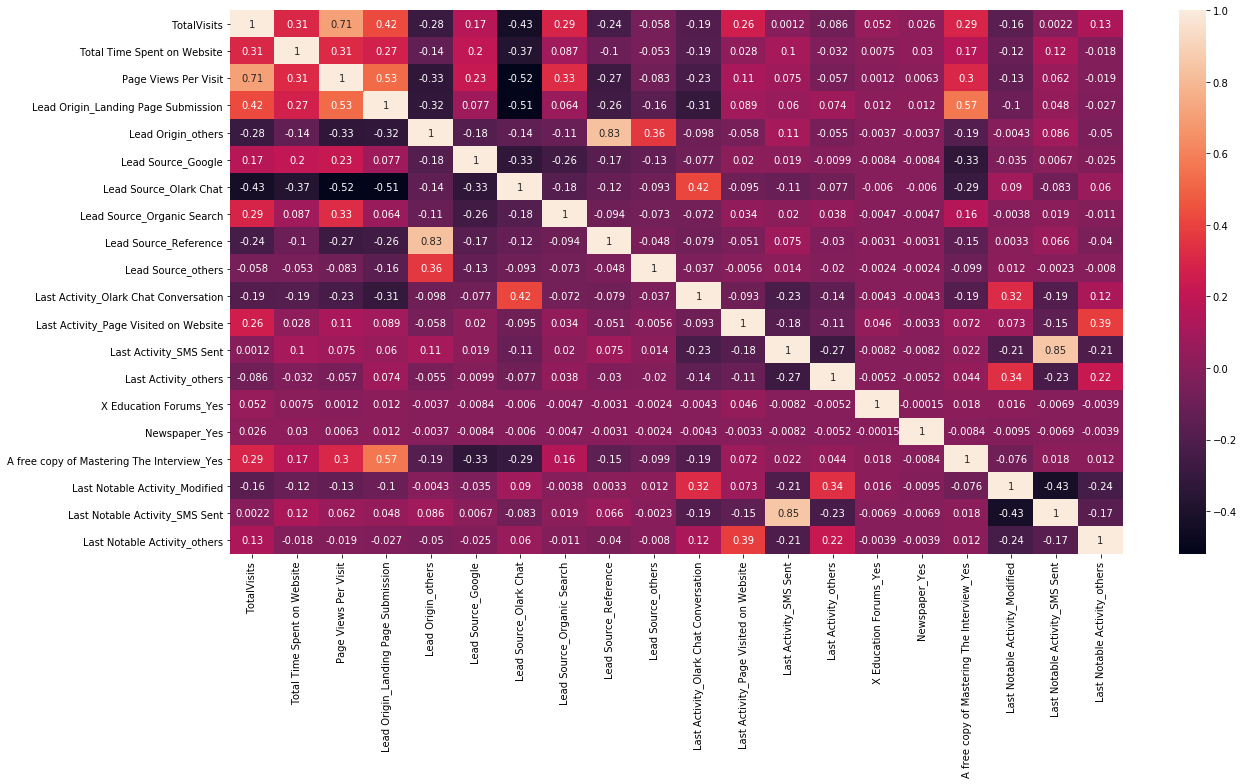

In [293]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [294]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_others', 'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [295]:
## dropping highly corerelated columns

X_train.drop(['Lead Origin_others','Last Activity_SMS Sent'],axis=1,inplace=True)
X_test.drop(['Lead Origin_others','Last Activity_SMS Sent'],axis=1,inplace=True)

### Checking Correlation Matrix

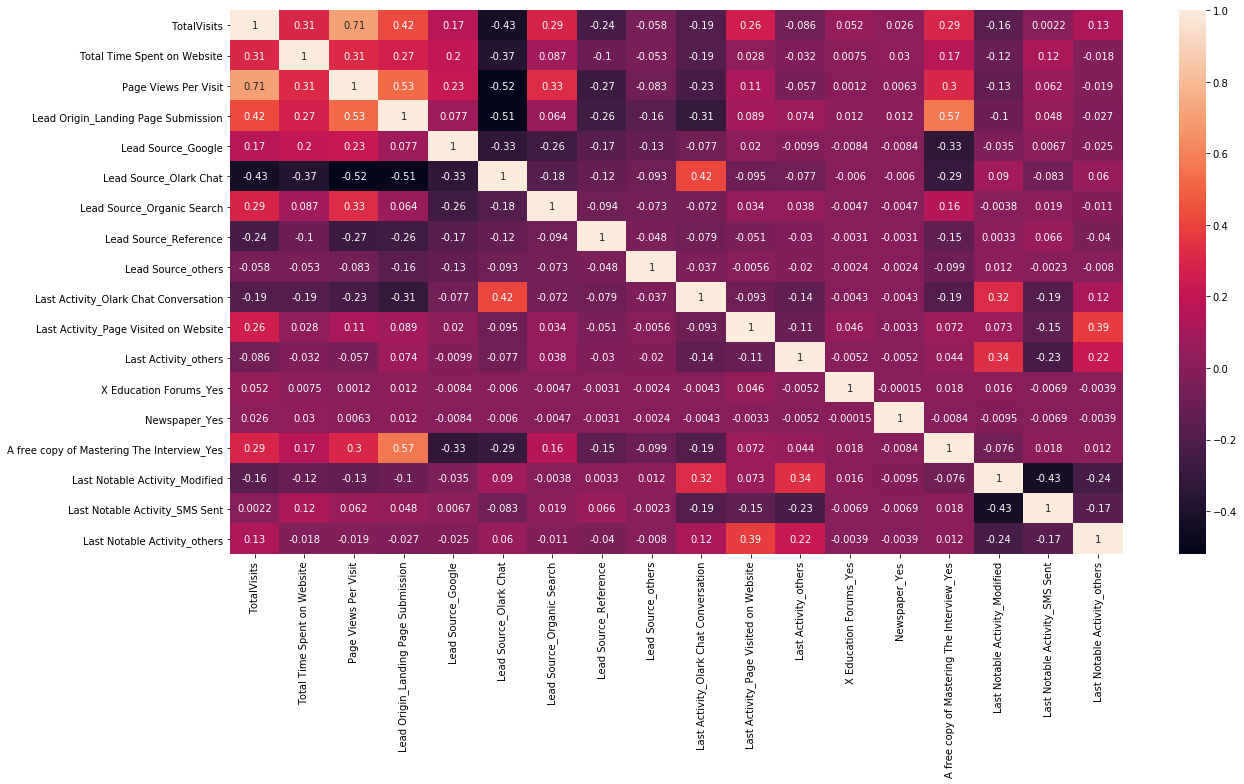

In [296]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

# Model Building

In [297]:
import statsmodels.api as sm 

In [298]:

logm1=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.9
Date:                Mon, 07 Sep 2020   Deviance:                       5877.7
Time:                        19:57:19   Pearson chi2:                 6.91e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0868      0.128     -8.510      0.000      -1.337      -0.837
TotalVisits                                    0.2319      0.047      4.900      0.000       0.139       0.325
Total Time Spent on Website                    1.1092      0.038     28.927      0.000       1.034       1.184
Page Views Per Visit                          -0.3119      0.052     -5.945      0.000      -0.415      -0.209
Lead Origin_Landing Page Submission           -0.1479      0.101     -1.465      0.143      -0.346       0.050
Lead Source_Google                             0.4208      0.107      3.925      0.000       0.211       0.631
Lead Source_Olark Chat                         1.0058      0.149      6.770      0.000       0.715       1.297
Lead Source_Organic Search                     0.2604      0.121      2.145      0.032       0.022       0.498
Lead Source_Reference                          3.9522      0.233     16.997      0.000       3.496       4.408
Lead Source_others                             1.8511      0.186      9.933      0.000       1.486       2.216
Last Activity_Olark Chat Conversation         -1.7461      0.181     -9.651      0.000      -2.101      -1.392
Last Activity_Page Visited on Website         -0.8962      0.181     -4.940      0.000      -1.252      -0.541
Last Activity_others                          -0.8657      0.138     -6.280      0.000      -1.136      -0.595
X Education Forums_Yes                       -19.7634   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Newspaper_Yes                                -22.3524   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
A free copy of Mastering The Interview_Yes    -0.0346      0.100     -0.346      0.729      -0.231       0.162
Last Notable Activity_Modified                -0.2561      0.102     -2.518      0.012      -0.455      -0.057
Last Notable Activity_SMS Sent                 1.3710      0.084     16.404      0.000       1.207       1.535
Last Notable Activity_others                   0.4727      0.177      2.665      0.008       0.125       0.820
==============================================================================================================
"""

## Feature Selection using RFE

In [299]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [300]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,12)
rfe=rfe.fit(X_train,y_train)

In [301]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True])

In [302]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_others', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_others', True, 1),
 ('X Education Forums_Yes', False, 4),
 ('Newspaper_Yes', True, 1),
 ('A free copy of Mastering The Interview_Yes', False, 7),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_others', True, 1)]

In [303]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Newspaper_Yes', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_others'],
      dtype='object')

In [304]:
X_train.columns[~rfe.support_]


Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Organic Search',
       'X Education Forums_Yes', 'A free copy of Mastering The Interview_Yes'],
      dtype='object')

### Assessing the model with Stats Models

In [305]:
X_train_sm = sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2965.9
Date:                Mon, 07 Sep 2020   Deviance:                       5931.9
Time:                        19:57:20   Pearson chi2:                 6.82e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1995      0.069    -17.329      0.000      -1.335      -1.064
Total Time Spent on Website               1.1056      0.038     29.143      0.000       1.031       1.180
Lead Source_Google                        0.3884      0.076      5.132      0.000       0.240       0.537
Lead Source_Olark Chat                    1.2366      0.104     11.877      0.000       1.033       1.441
Lead Source_Reference                     4.1869      0.206     20.305      0.000       3.783       4.591
Lead Source_others                        2.0061      0.159     12.585      0.000       1.694       2.319
Last Activity_Olark Chat Conversation    -1.7000      0.180     -9.437      0.000      -2.053      -1.347
Last Activity_Page Visited on Website    -0.7680      0.176     -4.356      0.000      -1.113      -0.422
Last Activity_others                     -0.8683      0.137     -6.336      0.000      -1.137      -0.600
Newspaper_Yes                           -22.0604   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Last Notable Activity_Modified           -0.2634      0.101     -2.608      0.009      -0.461      -0.065
Last Notable Activity_SMS Sent            1.3335      0.083     16.134      0.000       1.171       1.495
Last Notable Activity_others              0.5441      0.175      3.106      0.002       0.201       0.887
=========================================================================================================
"""

In [306]:
col

Index(['Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Newspaper_Yes', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_others'],
      dtype='object')

In [307]:
col=col.drop('Newspaper_Yes',1)
col

Index(['Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [308]:
X_train_sm1 = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm1, family=sm.families.Binomial())
res=logm3.fit()
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.6
Date:                Mon, 07 Sep 2020   Deviance:                       5935.3
Time:                        19:57:20   Pearson chi2:                 6.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2021      0.069    -17.370      0.000      -1.338      -1.066
Total Time Spent on Website               1.1033      0.038     29.116      0.000       1.029       1.178
Lead Source_Google                        0.3905      0.076      5.161      0.000       0.242       0.539
Lead Source_Olark Chat                    1.2360      0.104     11.873      0.000       1.032       1.440
Lead Source_Reference                     4.1861      0.206     20.303      0.000       3.782       4.590
Lead Source_others                        2.0061      0.159     12.586      0.000       1.694       2.319
Last Activity_Olark Chat Conversation    -1.7001      0.180     -9.440      0.000      -2.053      -1.347
Last Activity_Page Visited on Website    -0.7672      0.176     -4.354      0.000      -1.113      -0.422
Last Activity_others                     -0.8678      0.137     -6.335      0.000      -1.136      -0.599
Last Notable Activity_Modified           -0.2611      0.101     -2.586      0.010      -0.459      -0.063
Last Notable Activity_SMS Sent            1.3355      0.083     16.162      0.000       1.174       1.497
Last Notable Activity_others              0.5462      0.175      3.119      0.002       0.203       0.889
=========================================================================================================
"""

In [309]:
y_train_pred=res.predict(X_train_sm1)
y_train_pred[:10]


1033    0.301800
6534    0.538122
6237    0.051895
3190    0.916254
712     0.068305
3943    0.051895
6806    0.425957
9206    0.581912
4685    0.238222
4334    0.133946
dtype: float64

In [310]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30180033, 0.53812234, 0.05189521, 0.91625408, 0.06830472,
       0.05189521, 0.42595673, 0.58191232, 0.23822175, 0.13394629])

## Final values

In [311]:
trln=pd.DataFrame(train_leadnumber)

In [312]:
trln.shape

(6463, 1)

In [313]:
trln

,Lead Number
1033,649181.0
6534,599643.0
6237,601915.0
3190,629468.0
712,653091.0
...,...
350,656685.0
79,659710.0
8046,588139.0
6941,596419.0


In [314]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.shape

(6463, 3)

In [315]:
from sklearn import metrics

### Checking VIF

In [316]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [317]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_Modified,3.20
10,Last Notable Activity_others,2.29
7,Last Activity_others,2.26
5,Last Activity_Olark Chat Conversation,2.07
6,Last Activity_Page Visited on Website,1.80
2,Lead Source_Olark Chat,1.67
1,Lead Source_Google,1.36
9,Last Notable Activity_SMS Sent,1.27
0,Total Time Spent on Website,1.22
3,Lead Source_Reference,1.13


## Metrics Beyond Accuracy

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [319]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [320]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

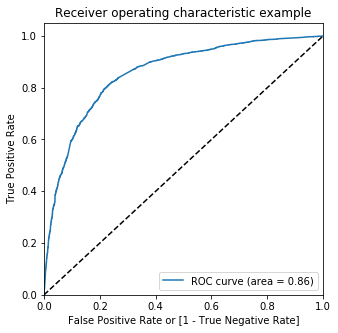

In [321]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [322]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ProspectID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.301800,1033,1,1,1,1,0,0,0,0,0,0
1,1.0,0.538122,6534,1,1,1,1,1,1,0,0,0,0
2,0.0,0.051895,6237,1,0,0,0,0,0,0,0,0,0
3,1.0,0.916254,3190,1,1,1,1,1,1,1,1,1,1
4,0.0,0.068305,712,1,0,0,0,0,0,0,0,0,0


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385115  1.000000  0.000000
0.1   0.1  0.550518  0.973483  0.285606
0.2   0.2  0.702770  0.913620  0.570710
0.3   0.3  0.775337  0.830856  0.740564
0.4   0.4  0.787560  0.759341  0.805234
0.5   0.5  0.791428  0.668140  0.868646
0.6   0.6  0.768993  0.533548  0.916457
0.7   0.7  0.752901  0.443150  0.946905
0.8   0.8  0.722575  0.330655  0.968042
0.9   0.9  0.668575  0.157895  0.988425


## we choose value 0.3 by giving sensitivity more weightage to get the numbers which have more propability to convert to ones

<Figure size 2160x720 with 0 Axes>

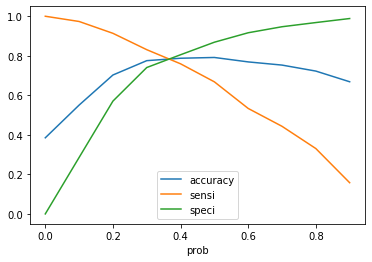

In [324]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(30,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [325]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,ProspectID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.301800,1033,1,1,1,1,0,0,0,0,0,0,1
1,1.0,0.538122,6534,1,1,1,1,1,1,0,0,0,0,1
2,0.0,0.051895,6237,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.916254,3190,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.068305,712,1,0,0,0,0,0,0,0,0,0,0


In [326]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7753365310227448

In [327]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
print(confusion)

[[2943 1031]
 [ 421 2068]]


In [328]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

## Sensitivity/Recall

In [329]:
# true positive/ actual positive
TP / float(TP+FN)

0.8308557653676175

## Specificity

In [330]:
# true negative/ actual positive
TN / float(TN+FP)

0.7405636638147962

In [331]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.25943633618520384


In [332]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6673120361406906


In [333]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8748513674197385


## Conclusion-: Keeping Sensitivity more to predict maximum Positives(Converted Candidates)

### Precision and recall tradeoff

In [334]:
from sklearn.metrics import precision_recall_curve

In [335]:
y_train_pred_final.Convert, y_train_pred_final.final_predicted

(0       0.0
 1       1.0
 2       0.0
 3       1.0
 4       0.0
        ... 
 6458    1.0
 6459    1.0
 6460    0.0
 6461    0.0
 6462    1.0
 Name: Convert, Length: 6463, dtype: float64,
 0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6458    0
 6459    1
 6460    0
 6461    0
 6462    1
 Name: final_predicted, Length: 6463, dtype: int64)

In [336]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

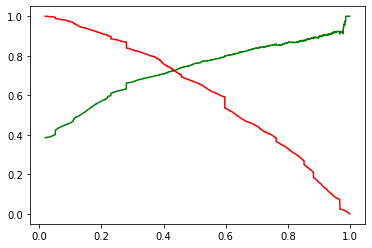

In [337]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [338]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [339]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'X Education Forums_Yes', 'Newspaper_Yes',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_others'],
      dtype='object')

In [340]:
X_train.shape

(6463, 18)

In [341]:
X_test.shape

(2770, 18)

In [342]:
col.shape

(11,)

In [343]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [344]:
X_test_sm = sm.add_constant(X_test[col])

In [345]:
y_test_pred = res.predict(X_test_sm)

In [346]:
y_test_pred[:10]

4871    0.715343
8687    0.888836
3719    0.365101
3511    0.413980
2507    0.160832
7811    0.745621
435     0.227738
7653    0.415074
4066    0.054695
2306    0.120255
dtype: float64

In [347]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [348]:
# Let's see the head
y_pred_1.head()

,0
4871,0.715343
8687,0.888836
3719,0.365101
3511,0.413980
2507,0.160832


In [349]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [350]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [351]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [352]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [353]:
y_pred_final.head()

,Converted,ProspectID,0
0,0.0,4871,0.715343
1,1.0,8687,0.888836
2,0.0,3719,0.365101
3,1.0,3511,0.413980
4,0.0,2507,0.160832


In [354]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [355]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['ProspectID','Convert','Convert_Prob'], axis=1)

In [356]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,ProspectID,Convert_Prob
0,0.0,4871,0.715343
1,1.0,8687,0.888836
2,0.0,3719,0.365101
3,1.0,3511,0.413980
4,0.0,2507,0.160832


In [357]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [358]:
y_pred_final.head()

,Converted,ProspectID,Convert_Prob,final_predicted
0,0.0,4871,0.715343,1
1,1.0,8687,0.888836,1
2,0.0,3719,0.365101,1
3,1.0,3511,0.413980,1
4,0.0,2507,0.160832,0


In [359]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7660649819494585

In [360]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1228,  473],
       [ 175,  894]], dtype=int64)

In [361]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives 
FP = confusion2[0,1] # false positives 
FN = confusion2[1,0] # false negatives 

## Sensitivity

In [362]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8362956033676333

## Specificity

In [363]:
# Let us calculate specificity
TN / float(TN+FP)

0.721928277483833

In [364]:
y_pred_final.head()

,Converted,ProspectID,Convert_Prob,final_predicted
0,0.0,4871,0.715343,1
1,1.0,8687,0.888836,1
2,0.0,3719,0.365101,1
3,1.0,3511,0.413980,1
4,0.0,2507,0.160832,0


In [365]:
y_pred_final['Score']=y_pred_final['Convert_Prob']*100

In [366]:
y_pred_final.head()

,Converted,ProspectID,Convert_Prob,final_predicted,Score
0,0.0,4871,0.715343,1,71.534346
1,1.0,8687,0.888836,1,88.883621
2,0.0,3719,0.365101,1,36.510101
3,1.0,3511,0.413980,1,41.397980
4,0.0,2507,0.160832,0,16.083242


In [367]:
k1=y_pred_final[['ProspectID','Score']]
k1.head()

,ProspectID,Score
0,4871,71.534346
1,8687,88.883621
2,3719,36.510101
3,3511,41.397980
4,2507,16.083242


In [368]:
y_train_pred_final['Score']=y_train_pred_final['Convert_Prob']*100
y_train_pred_final.head()

,Convert,Convert_Prob,ProspectID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Score
0,0.0,0.301800,1033,1,1,1,1,0,0,0,0,0,0,1,30.180033
1,1.0,0.538122,6534,1,1,1,1,1,1,0,0,0,0,1,53.812234
2,0.0,0.051895,6237,1,0,0,0,0,0,0,0,0,0,0,5.189521
3,1.0,0.916254,3190,1,1,1,1,1,1,1,1,1,1,1,91.625408
4,0.0,0.068305,712,1,0,0,0,0,0,0,0,0,0,0,6.830472


In [369]:
k2=y_train_pred_final[['ProspectID','Score']]
k2.head()

,ProspectID,Score
0,1033,30.180033
1,6534,53.812234
2,6237,5.189521
3,3190,91.625408
4,712,6.830472


In [370]:
df2.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,X Education Forums_Yes,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,660737.0,0.0,0.0,0.0,0.0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,660728.0,0.0,5.0,674.0,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,660727.0,1.0,2.0,1532.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,660719.0,0.0,1.0,305.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,660681.0,1.0,2.0,1428.0,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [371]:
df_score=pd.concat([k1,k2])

In [372]:
df_score.reset_index(drop=True)

,ProspectID,Score
0,4871,71.534346
1,8687,88.883621
2,3719,36.510101
3,3511,41.397980
4,2507,16.083242
...,...,...
9228,350,14.311569
9229,79,95.974106
9230,8046,6.190594
9231,6941,16.192447


In [373]:
df_score.columns

Index(['ProspectID', 'Score'], dtype='object')

In [386]:
df_score.sort_values(by =['ProspectID'], ascending=True,inplace=True)
df_score

,ProspectID,Score
2278,0,12.213502
1141,1,30.651551
6436,2,71.493130
1923,3,6.345250
1916,4,49.265453
...,...,...
5389,9235,77.401142
940,9236,41.020698
1211,9237,39.126091
4978,9238,63.538874


In [390]:
df_score.set_index('ProspectID',inplace=True)

In [391]:
df2.shape

(9233, 22)

In [392]:
df_score.shape

(9233, 1)

## Adding Score Column in Dataframe

In [395]:
result = pd.concat([df2,df_score],join='outer',axis=1,ignore_index=False)

In [396]:
result.head(100)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,X Education Forums_Yes,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others,Score
0,660737.0,0.0,0.0,0.0,0.0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,12.213502
1,660728.0,0.0,5.0,674.0,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30.651551
2,660727.0,1.0,2.0,1532.0,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,71.493130
3,660719.0,0.0,1.0,305.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,6.345250
4,660681.0,1.0,2.0,1428.0,1.0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,49.265453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,659562.0,0.0,4.0,161.0,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,10.192755
96,659555.0,0.0,2.0,511.0,2.0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,13.185335
97,659545.0,0.0,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,5.189521
98,659523.0,1.0,5.0,1110.0,5.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,18.167934


In [397]:
result.Score.describe()

count    9233.000000
mean       38.741237
std        29.631958
min         1.565426
25%        12.324417
50%        28.007077
75%        61.975581
max        99.808659
Name: Score, dtype: float64